In [1]:
using Statistics
using StatsBase
using RDatasets
using Plots
using StatsPlots
using KernelDensity
using Distributions
using LinearAlgebra
using HypothesisTests
using PyCall
using MLBase

ArgumentError: ArgumentError: Package StatsBase not found in current path.
- Run `import Pkg; Pkg.add("StatsBase")` to install the StatsBase package.

In [3]:
using MAT
M = matread("parametersForAnalysisJulia.mat")
M = M["newMat"]

D = M
#@show names(D)
#D

112×11 Matrix{Float64}:
 0.697852  0.5781      0.922823  …  1.0323   1.06635   12.6061  1.16478
 0.632348  0.546651    1.32819      1.0634   1.18068   13.38    1.19307
 0.543271  0.68168     0.946423     1.10529  1.03483   10.9953  1.18442
 0.63015   0.489495    0.659253     1.06593  1.01285   14.7324  1.17889
 0.359591  0.649785    0.945957     1.18609  1.04897   11.2018  1.15077
 0.592957  0.651926    0.864919  …  1.07938  1.01768   11.007   1.13993
 0.765515  0.520816    0.653773     1.0104   0.991737  13.7815  1.15978
 0.763867  0.556291    0.722817     1.01089  1.0048    13.0193  1.16506
 0.759978  0.60887     1.5297       1.01085  1.19885   12.451   1.20678
 0.735902  0.5425      0.791218     1.0223   1.04677   13.6233  1.18293
 ⋮                               ⋱                              ⋮
 0.444043  0.517315    2.41174      1.1503   1.36392   13.8649  1.17061
 0.454803  0.632622    1.15655      1.12904  1.0977    11.1501  1.12886
 0.797521  0.640179    0.913091  …  0.99742  1

In [6]:
describe(D)

MethodError: MethodError: no method matching quantile!(::Matrix{Float64}, ::Vector{Float64}; sorted=false, alpha=1.0, beta=1.0)
Closest candidates are:
  quantile!(::AbstractArray, ::AbstractVector, !Matched::AbstractArray; sorted, alpha, beta) at C:\Users\shayn\AppData\Local\Programs\Julia-1.8.5\share\julia\stdlib\v1.8\Statistics\src\Statistics.jl:936
  quantile!(!Matched::AbstractVector, ::Union{Tuple{Vararg{Real}}, AbstractArray}; sorted, alpha, beta) at C:\Users\shayn\AppData\Local\Programs\Julia-1.8.5\share\julia\stdlib\v1.8\Statistics\src\Statistics.jl:953

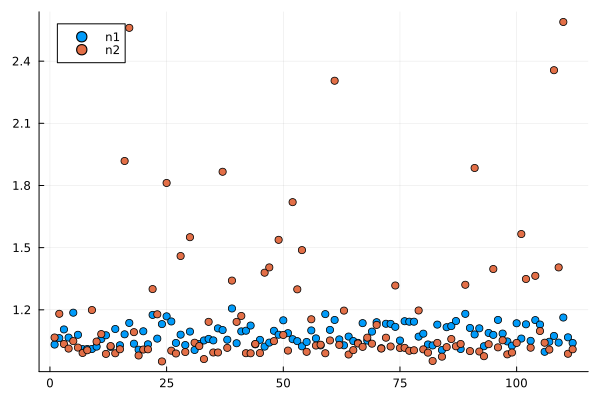

In [9]:
n1 = D[:,8]
scatter(n1,label="n1")
n2 = D[:,9]
scatter!(n2,label="n2")

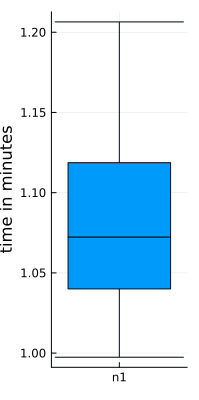

In [10]:
boxplot(["n1"],n1,legend=false,size=(200,400),whisker_width=1,ylabel="time in minutes")

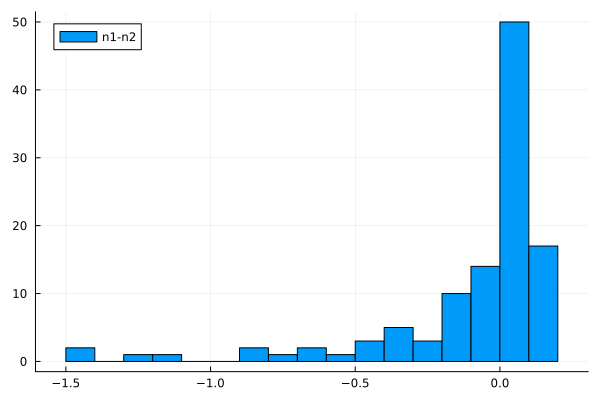

In [11]:
histogram(n1-n2,label="n1-n2")

Arguments

* x: AbstractVector of values to be binned
* bins: Integer, NTuple{2,Integer}, AbstractVector or Symbol. Default is :auto (the Freedman-Diaconis rule). For histogram-types, defines the approximate number of bins to aim for, or the auto-binning algorithm to use (:sturges, :sqrt, :rice, :scott or :fd For fine-grained control pass a Vector of break values, e.g. range(minimum(x), stop = maximum(x), length = 25)
* weights: Vector of weights for the values in x, for weighted bin counts
* normalize: Bool or Symbol. Histogram normalization mode. Possible values are: false/:none (no normalization, default), true/:pdf (normalize to a discrete Probability Density Function, where the total area of the bins is 1), :probability (bin heights sum to 1) and :density (the area of each bin, rather than the height, is equal to the counts - useful for uneven bin sizes).
* bar_position: Symbol. Choose from :overlay (default), :stack. (warning: May not be implemented fully)
* bar_width: nothing or Number. Width of bars in data coordinates. When nothing, chooses based on x (or y when orientation = :h).
* bar_edges: Bool. Align bars to edges (true), or centers (the default)?
* orientation: Symbol. Horizontal or vertical orientation for bar types. Values :h, :hor, :horizontal correspond to horizontal (sideways, anchored to y-axis), and :v, :vert, and :vertical correspond to vertical 

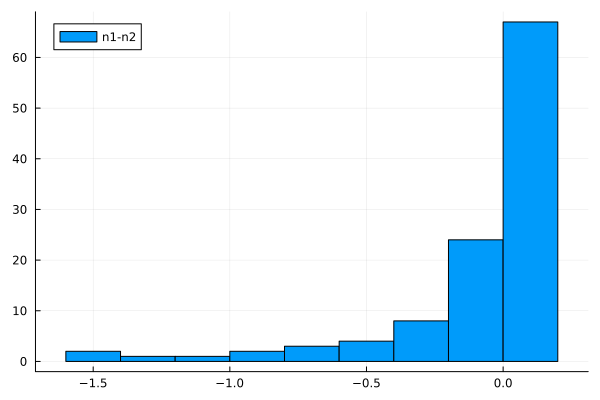

In [12]:
histogram(n1-n2,bins=:sqrt,label="n1-n2")

In [35]:
p=kde(n1-n2)
length(n1)
p.density

2048-element Vector{Float64}:
 7.860994930017351e-5
 7.955140052934295e-5
 8.097172578225287e-5
 8.28766473414122e-5
 8.527403348956852e-5
 8.817391286902732e-5
 9.158849440379924e-5
 9.553219273539248e-5
 0.00010002165911066063
 0.00010507581766586171
 ⋮
 9.180292183734451e-5
 8.833768902655192e-5
 8.539686063128993e-5
 8.296654377634716e-5
 8.103512252043144e-5
 7.959321944554787e-5
 7.863366336297029e-5
 7.815146306826282e-5
 7.814378708013991e-5

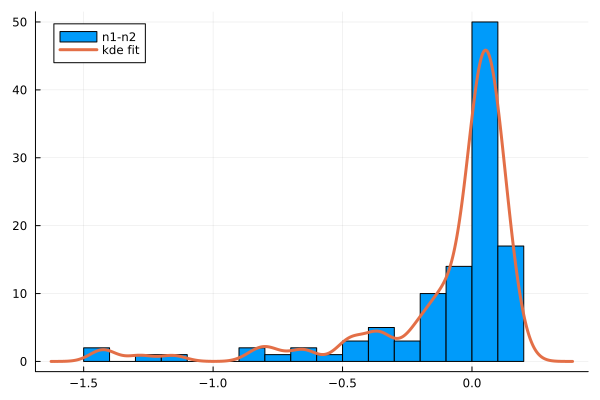

In [32]:
histogram(n1-n2,bins=20,label="n1-n2")
plot!(p.x,p.density .* 12, linewidth=3,color=2,label="kde fit") # nb of elements*bin width

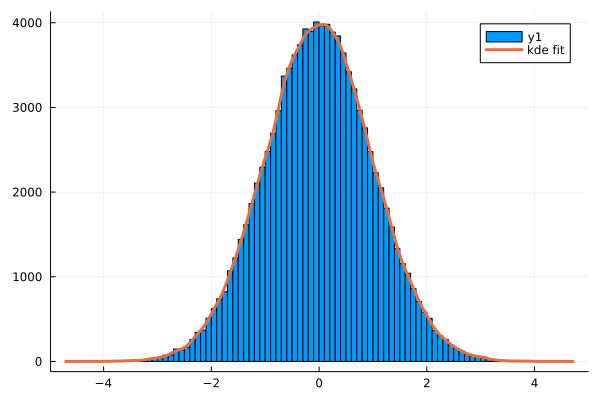

In [29]:
myrandomvector = randn(100000)
histogram(myrandomvector)
p=kde(myrandomvector)
plot!(p.x,p.density .* length(myrandomvector) .*0.1, linewidth=3,color=2,label="kde fit") # nb of elements*bin width

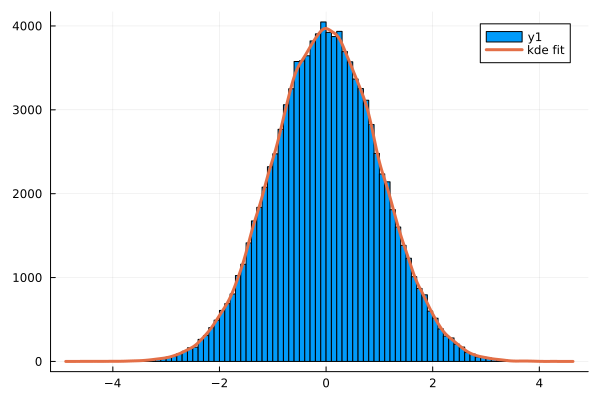

In [30]:
d = Normal()
myrandomvector = rand(d,100000)
histogram(myrandomvector)
p=kde(myrandomvector)
plot!(p.x,p.density .* length(myrandomvector) .*0.1, linewidth=3,color=2,label="kde fit") # nb of elements*bin width

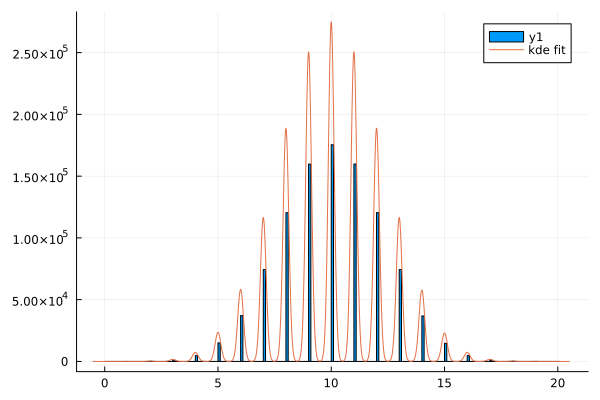

In [32]:
b = Binomial(20) 
myrandomvector = rand(b,1000000)
histogram(myrandomvector)
p=kde(myrandomvector)
plot!(p.x,p.density .* length(myrandomvector) .*0.5,color=2,label="kde fit") # nb of elements*bin width

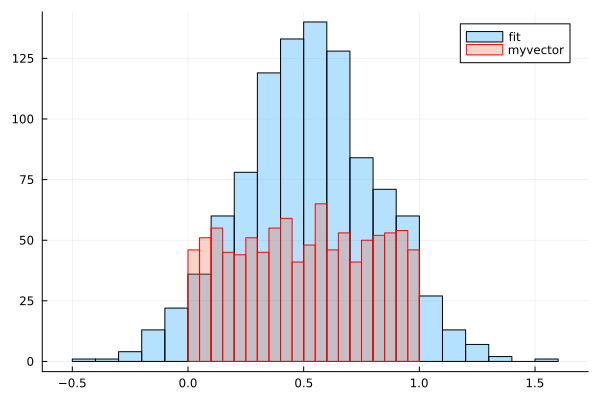

In [33]:
x = rand(1000)
d = fit(Normal, x)
myrandomvector = rand(d,1000)
histogram(myrandomvector,nbins=20,fillalpha=0.3,label="fit")
histogram!(x,nbins=20,linecolor = :red,fillalpha=0.3,label="myvector")

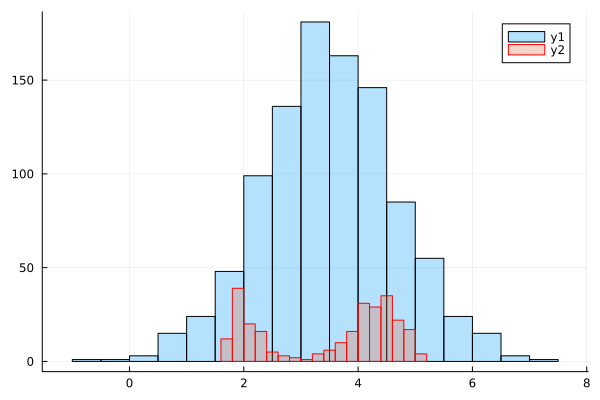

In [35]:
x = eruptions
d = fit(Normal, x)
myrandomvector = rand(d,1000)
histogram(myrandomvector,nbins=20,fillalpha=0.3)
histogram!(x,nbins=20,linecolor = :red,fillalpha=0.3)

In [38]:
myrandomvector = randn(1000)
OneSampleTTest(myrandomvector)

One sample t-test
-----------------
Population details:
    parameter of interest:   Mean
    value under h_0:         0
    point estimate:          -0.0389316
    95% confidence interval: (-0.09915, 0.02128)

Test summary:
    outcome with 95% confidence: fail to reject h_0
    two-sided p-value:           0.2048

Details:
    number of observations:   1000
    t-statistic:              -1.2687096713098378
    degrees of freedom:       999
    empirical standard error: 0.03068595757613635


In [39]:
OneSampleTTest(eruptions)

One sample t-test
-----------------
Population details:
    parameter of interest:   Mean
    value under h_0:         0
    point estimate:          3.48778
    95% confidence interval: (3.352, 3.624)

Test summary:
    outcome with 95% confidence: reject h_0
    two-sided p-value:           <1e-99

Details:
    number of observations:   272
    t-statistic:              50.39726752574924
    degrees of freedom:       271
    empirical standard error: 0.06920579744632577


In [42]:
scipy_stats = pyimport("scipy.stats")
@show scipy_stats.spearmanr(eruptions,waittime)
@show scipy_stats.pearsonr(eruptions,waittime)

scipy_stats.spearmanr(eruptions, waittime) = (0.7779720576516121, 1.9895419906561382e-56)
scipy_stats.pearsonr(eruptions, waittime) = (0.9008111683218126, 8.12995850662248e-100)


(0.9008111683218126, 8.12995850662248e-100)

In [43]:
scipy_stats.pearsonr(eruptions,waittime)

(0.9008111683218126, 8.12995850662248e-100)

In [44]:
corspearman(eruptions,waittime)

0.7779720576516121

In [45]:
cor(eruptions,waittime)

0.900811168321813

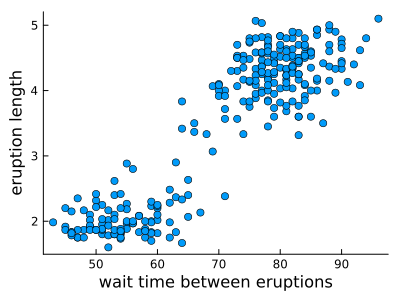

In [51]:
scatter(waittime,eruptions,ylabel="eruption length",
    xlabel="wait time between eruptions",legend=false,grid=false,size=(400,300))

In [47]:
gt = [1, 1, 1, 1, 1, 1, 1, 2]
pred = [1, 1, 2, 2, 1, 1, 1, 1]
C = confusmat(2, gt, pred)   # compute confusion matrix
C ./ sum(C, dims=2)   # normalize per class
sum(diag(C)) / length(gt)  # compute correct rate from confusion matrix
correctrate(gt, pred)
C = confusmat(2, gt, pred)  

2×2 Matrix{Int64}:
 5  2
 1  0

In [48]:
gt = [1, 1, 1, 1, 1, 1, 1, 0];
pred = [1, 1, 0, 0, 1, 1, 1, 1]
ROC = MLBase.roc(gt,pred)
recall(ROC)
precision(ROC)

0.8333333333333334